In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits import mplot3d
set_style("whitegrid")

In [2]:
clTrials = pd.read_csv("CancerClinicalTrialData.csv")

In [3]:
Counter(clTrials["Funded Bys"]).most_common

<bound method Counter.most_common of Counter({'Industry': 4053, 'Other': 2515, 'Other|Industry': 1851, 'Other|NIH': 1471, 'NIH': 786, 'Industry|Other': 146, 'Other|NIH|Industry': 117, 'NIH|Other': 76, 'Other|Industry|NIH': 42, 'Other|U.S. Fed': 41, 'U.S. Fed': 33, 'U.S. Fed|Other': 13, 'Industry|NIH': 13, 'Other|U.S. Fed|Industry': 8, 'Other|Industry|U.S. Fed': 7, 'NIH|Industry': 6, 'Other|U.S. Fed|NIH': 4, 'Industry|Other|U.S. Fed': 2, 'Industry|Other|NIH': 2, 'Industry|NIH|Other': 2, 'U.S. Fed|Industry': 2, 'NIH|Other|Industry': 2, 'U.S. Fed|NIH|Other': 1, 'U.S. Fed|NIH': 1, 'NIH|Other|U.S. Fed': 1, 'Industry|U.S. Fed': 1})>

In [4]:
clTrials

,Rank,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Designs,Start Date,Completion Date,Study Duration (months),Locations,URL
0,1,Immediate-Release Oxycodone Capsules Study in ...,Completed,Has Results,Cancer,Drug: Oxycodone|Drug: Morphine,Numerical Rating Scale (NRS)|The Average Dose ...,All,"18 Years to 80 Years (Adult, Older Adult)",Phase 3,242,Industry,Allocation: Randomized|Intervention Model: Par...,Jan-11,Jul-12,18,NaN,https://ClinicalTrials.gov/show/NCT01675622
1,2,A Phase II Study of Nivolumab in Combination W...,Completed,Has Results,Breast Cancer,Drug: Nivolumab|Drug: Cabozantinib,Overall Response Rate|Number of Participants W...,Female,"18 Years and older (Adult, Older Adult)",Phase 2,18,Other|Industry,Allocation: N/A|Intervention Model: Single Gro...,30-Nov-17,30-Aug-19,21,"Dana-Farber Cancer Institute, Boston, Massachu...",https://ClinicalTrials.gov/show/NCT03316586
2,3,"Radiation, Cetuximab and Pemetrexed With or Wi...",Completed,Has Results,Cancer,Drug: Bevacizumab|Drug: Cetuximab|Drug: Pemetr...,2-year Progression-free Survival (PFS)|2-year ...,All,"18 Years and older (Adult, Older Adult)",Phase 2,80,Other|Industry,Allocation: Randomized|Intervention Model: Sin...,Oct-08,Sep-14,71,"University of Pittsburgh Medical Center, Pitts...",https://ClinicalTrials.gov/show/NCT00703976
3,4,Fulvestrant Plus Enzalutamide in ER+/Her2- Adv...,Completed,Has Results,Breast Cancer,Drug: Fulvestrant with Enzalutamide,Clinical Benefit Rate of the Combination of En...,Female,"18 Years to 100 Years (Adult, Older Adult)",Phase 2,32,Other|U.S. Fed,Allocation: N/A|Intervention Model: Single Gro...,6-Jul-17,10-Apr-20,33,"University of Colorado, Aurora, Colorado, Unit...",https://ClinicalTrials.gov/show/NCT02953860
4,5,PROspective Non-interventional Open laBEl Tria...,Completed,Has Results,Cancer,Drug: Oxycodone/Naloxone,Change in Numeric Rating Scales (NRS) Score|Ch...,All,"20 Years and older (Adult, Older Adult)",Phase 4,359,Industry,Allocation: N/A|Intervention Model: Single Gro...,Jul-12,Apr-14,21,13 sites including Yeungnam University Medical...,https://ClinicalTrials.gov/show/NCT01719757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11191,11192,Safety and Efficacy of ATIR101 as Adjunctive T...,Terminated,Has Results,Acute Myeloid Leukemia|Acute Lymphoblastic Leu...,Biological: ATIR101|Drug: Cyclophosphamide|Pro...,"Graft-versus-host Disease-free, Relapse-free S...",All,"18 Years to 70 Years (Adult, Older Adult)",Phase 3,63,Industry,Allocation: Randomized|Intervention Model: Par...,29-Nov-17,17-Dec-21,48,"City of Hope National Medical Center, Duarte, ...",https://ClinicalTrials.gov/show/NCT02999854
11192,11193,CD24Fc for the Treatment of Immune Related Adv...,Terminated,Has Results,Advanced Malignant Solid Neoplasm,Biological: CD24 Extracellular Domain-IgG1 Fc ...,Incidence of New Adverse Event (AE) of >= Grad...,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,3,Other|NIH|Industry,Allocation: Randomized|Intervention Model: Par...,30-Oct-20,26-Jan-22,14,University of California Davis Comprehensive C...,https://ClinicalTrials.gov/show/NCT04552704
11193,11194,Immune Checkpoint Inhibitor M7824 and the Immu...,Terminated,Has Results,Histologically or Cytologically Confirmed Panc...,Drug: M7824|Drug: M9241|Radiation: SBRT,Recommended Phase 2 Dose (RP2D) of NHS-IL12 (M...,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,3,NIH,Allocation: Non-Randomized|Intervention Model:...,15-Jun-21,3-Feb-22,7,"National Institutes of Health Clinical Center,...",https://ClinicalTrials.gov/show/NCT04327986
11194,11195,Study of Euthyroid Hypothyroxinemia in Metasta...,Terminated,Has Results,Metastatic Breast Cancer|Thyroid Dysfunction,Drug: Triiodothyronine (T3),Number of Participants With Progression-free S...,All,"18 Years to 105 Years (Adult, Older Adult)",Phase 2,7,Other,Allocation: N/A|Intervention Model: Single Gro...,1-Mar-19,

In [5]:
def check_breast_substring(x):
    if "Breast" in x:
        return 1
    else:
        return 0
def check_blood_substring(x):
    if "Leukemia" in x:
        return 1
    elif "Lymphoma" in x:
        return 1
    elif "Myeloma" in x:
        return 1
    elif "Blood" in x:
        return 1
    else:
        return 0
def check_lung_substring(x):
    if "Lung" in x:
        return 1
    else:
        return 0
def check_colorectal_substring(x):
    if "Colorectal" in x:
        return 1
    else:
        return 0
def check_ovarian_substring(x):
    if "Ovarian" in x:
        return 1
    else:
        return 0
def check_cervical_substring(x):
    if "Cervical" in x:
        return 1
    else:
        return 0
    
def check_melanoma_substring(x):
    if "Melanoma" in x:
        return 1
    else:
        return 0
    
def check_pancreatic_substring(x):
    if "Pancreatic" in x:
        return 1
    else:
        return 0
def check_treatment_substring(x):
    if "Treatment" in x:
        return 1
    else:
        return 0
def check_industry_substring(x):
    if "Industry" in x:
        return 1
    else:
        return 0
def check_fed_substring(x):
    if "Fed" in x:
        return 1
    elif "NIH" in x:
        return 1
    else:
        return 0
def check_female_substring(x):
    if "Female" in x:
        return 1
    else:
        return 0    
def check_male_substring(x):
    if "Male" in x:
        return 1
    else:
        return 0    
def check_metastatic_substring(x):
    if "Metastatic" in x:
        return 1
    else:
        return 0     
def check_complete_substring(x):
    if "Completed" in x:
        return 1
    else:
        return 0     

In [6]:
clTrials["Breast Cancer"] = clTrials["Conditions"].apply(check_breast_substring)
clTrials["Blood Cancer"] = clTrials["Conditions"].apply(check_blood_substring)
clTrials["Lung Cancer"] = clTrials["Conditions"].apply(check_lung_substring)
clTrials["Colorectal Cancer"] = clTrials["Conditions"].apply(check_colorectal_substring)
clTrials["Ovarian Cancer"] = clTrials["Conditions"].apply(check_ovarian_substring)
clTrials["Cervical Cancer"] = clTrials["Conditions"].apply(check_cervical_substring)
clTrials["Melanoma Cancer"] = clTrials["Conditions"].apply(check_melanoma_substring)
clTrials["Pancreatic Cancer"] = clTrials["Conditions"].apply(check_pancreatic_substring)
clTrials['Study Designs'] = clTrials['Study Designs'].astype('str')
clTrials["Treatment (Purpose)"] = clTrials["Study Designs"].apply(check_treatment_substring)
clTrials["Fed Funding"] = clTrials["Funded Bys"].apply(check_industry_substring)
clTrials["Industry Funding"] = clTrials["Funded Bys"].apply(check_fed_substring)
clTrials['Gender'] = clTrials['Gender'].astype('str')
clTrials["Female"] = clTrials["Gender"].apply(check_female_substring)
clTrials["Male"] = clTrials["Gender"].apply(check_male_substring)
clTrials["Metastatic"] = clTrials["Conditions"].apply(check_metastatic_substring)
phase_mapper = {"Not Applicable":0, "Early Phase 1":1, "Phase 1":1, "Phase 1|Phase 2":2, "Phase 2":3, "Phase 2|Phase 3":4, "Phase 3":5, "Phase 4":6}
clTrials["Phases Num"] = clTrials["Phases"].replace(phase_mapper)
clTrials["Completed Status"] = clTrials["Status"].apply(check_complete_substring)

In [7]:
clTrials = clTrials[clTrials["Treatment (Purpose)"] == 1]

In [8]:
Br = clTrials["Breast Cancer"] == 1 
Bl = clTrials["Blood Cancer"] == 1 
Co = clTrials["Colorectal Cancer"] == 1 
Ov = clTrials["Ovarian Cancer"] == 1 
Ce = clTrials["Cervical Cancer"] == 1 
Me = clTrials["Melanoma Cancer"] == 1
Pa = clTrials["Pancreatic Cancer"] == 1
np.size(clTrials[Br | Bl | Co | Ov | Ce | Me | Pa],0)

4420

In [9]:
clTrials = clTrials[Br | Bl | Co | Ov | Ce | Me | Pa]

In [10]:
Counter(clTrials["Breast Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 3391, 1: 1029})>

In [11]:
Counter(clTrials["Blood Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 2336, 1: 2084})>

In [12]:
Counter(clTrials["Lung Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 4344, 1: 76})>

In [13]:
Br = clTrials["Breast Cancer"] == 1 
Bl = clTrials["Blood Cancer"] == 1 
Co = clTrials["Colorectal Cancer"] == 1 
Ov = clTrials["Ovarian Cancer"] == 1 
Ce = clTrials["Cervical Cancer"] == 1 
Me = clTrials["Melanoma Cancer"] == 1
Pa = clTrials["Pancreatic Cancer"] == 1
np.size(clTrials[Br | Bl | Co | Ov | Ce | Me | Pa],0)

4420

In [14]:
Counter(clTrials["Metastatic"]).most_common

<bound method Counter.most_common of Counter({0: 4042, 1: 378})>

In [15]:
clTrials = clTrials[Br | Bl | Co | Ov | Ce | Me | Pa]

In [16]:
Counter(clTrials["Breast Cancer"]).most_common

<bound method Counter.most_common of Counter({0: 3391, 1: 1029})>

In [17]:
met = clTrials["Metastatic"] == 1
notMet = clTrials["Metastatic"] == 0
comp = clTrials["Completed Status"] == 1
perMetComp = np.size(clTrials[met & comp],0) / 378 * 100
perNotMetComp = np.size(clTrials[notMet & comp],0) / 4042 * 100

print(perMetComp)
print(perNotMetComp)

71.16402116402116
72.88471053933696


In [18]:
Counter(clTrials["Phases Num"]).most_common

<bound method Counter.most_common of Counter({3.0: 2567, 2.0: 640, 5.0: 520, 1.0: 377, 0.0: 220, 6.0: 66, 4.0: 30})>

In [19]:
Br = clTrials["Breast Cancer"] == 1 
Bl = clTrials["Blood Cancer"] == 1 
Co = clTrials["Colorectal Cancer"] == 1 
Ov = clTrials["Ovarian Cancer"] == 1 
Ce = clTrials["Cervical Cancer"] == 1 
Me = clTrials["Melanoma Cancer"] == 1
Pa = clTrials["Pancreatic Cancer"] == 1
Fe = clTrials["Female"] == 1
Ma = clTrials["Female"] == 0

perBrComp = np.size(clTrials[Br & comp],0) / 1029 * 100
perBlComp = np.size(clTrials[Bl & comp],0) / 2084 * 100

print(perBrComp)
print(perBlComp)

74.82993197278913
71.83301343570058


In [20]:
perFeComp = np.size(clTrials[Fe & comp],0) / 938 * 100

print(perFeComp)

74.6268656716418


In [21]:
perNotFeComp = np.size(clTrials[Ma & comp],0) / 3482 * 100

print(perNotFeComp)

72.22860425043078


In [22]:
P1 = clTrials["Phases Num"] == 1
perP1Comp = np.size(clTrials[P1 & comp],0) / 377 * 100
print(perP1Comp)

P2 = clTrials["Phases Num"] == 2
perP2Comp = np.size(clTrials[P2 & comp],0) / 640 * 100
print(perP2Comp)

P3 = clTrials["Phases Num"] == 3
perP3Comp = np.size(clTrials[P3 & comp],0) / 2567 * 100
print(perP3Comp)

P4 = clTrials["Phases Num"] == 4
perP4Comp = np.size(clTrials[P4 & comp],0) / 30 * 100
print(perP4Comp)

P5 = clTrials["Phases Num"] == 5
perP5Comp = np.size(clTrials[P5 & comp],0) / 520 * 100
print(perP5Comp)

P6 = clTrials["Phases Num"] == 6
perP6Comp = np.size(clTrials[P6 & comp],0) / 66 * 100
print(perP6Comp)

P0 = clTrials["Phases Num"] == 0
perP0Comp = np.size(clTrials[P0 & comp],0) / 220 * 100
print(perP0Comp)


73.74005305039788
66.875
71.71795870666148
70.0
83.26923076923077
84.84848484848484
71.81818181818181


In [23]:
Counter(clTrials["Funded Bys"]).most_common

<bound method Counter.most_common of Counter({'Industry': 1593, 'Other': 855, 'Other|Industry': 837, 'Other|NIH': 610, 'NIH': 336, 'Industry|Other': 67, 'Other|NIH|Industry': 47, 'NIH|Other': 34, 'Other|Industry|NIH': 18, 'Other|U.S. Fed': 6, 'Industry|NIH': 5, 'NIH|Industry': 3, 'Other|U.S. Fed|Industry': 2, 'Other|Industry|U.S. Fed': 2, 'Industry|Other|U.S. Fed': 1, 'U.S. Fed': 1, 'Industry|NIH|Other': 1, 'Other|U.S. Fed|NIH': 1, 'Industry|Other|NIH': 1})>

In [24]:
np.size(clTrials[clTrials["Fed Funding"] == 1],0)

2577

In [25]:
F1 = clTrials["Industry Funding"] == 1
perF1Comp = np.size(clTrials[F1 & comp],0) / 1068 * 100
print(perF1Comp)

F2 = clTrials["Fed Funding"] == 1
perF2Comp = np.size(clTrials[F2 & comp],0) / 2577 * 100
print(perF2Comp)


73.40823970037454
74.54404346138921


In [26]:
np.size(clTrials[~(F1 | F2)],0)

855

In [27]:
perF3Comp = np.size(clTrials[~(F1 | F2) & comp],0) / 855 * 100
print(perF3Comp)

65.84795321637426


In [28]:
clTrials.columns

Index(['Rank', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Funded Bys', 'Study Designs', 'Start Date',
       'Completion Date', 'Study Duration (months)', 'Locations', 'URL',
       'Breast Cancer', 'Blood Cancer', 'Lung Cancer', 'Colorectal Cancer',
       'Ovarian Cancer', 'Cervical Cancer', 'Melanoma Cancer',
       'Pancreatic Cancer', 'Treatment (Purpose)', 'Fed Funding',
       'Industry Funding', 'Female', 'Male', 'Metastatic', 'Phases Num',
       'Completed Status'],
      dtype='object')

In [29]:
# Add Minimum Age columns

age_str = clTrials["Age"].copy()

for i in range(len(age_str)):
    flag = 0
    for m in age_str.iloc[i].split(): 
        if m.isdigit():
            flag = 1
    if flag == 1:
        age_str.iloc[i] = [int(m) for m in age_str.iloc[i].split() if m.isdigit()]
    else:         
        age_str.iloc[i] = [0]
    age_str.iloc[i] = min(age_str.iloc[i])
     
clTrials["Minimum Age"] = age_str

In [30]:
# We add Hospital column

def check_hospital_substring(x):
    if 'Hospital' in x:
        return 1
    elif 'University' in x:
        return 1
    elif 'Medical Center' in x:
        return 1
    elif 'National Institutes of Health' in x:
        return 1
    else:
        return 0
clTrials['Locations'] = clTrials['Locations'].astype('str')
clTrials["Hospital"] = clTrials["Locations"].apply(check_hospital_substring)

In [31]:
#Add Intervention Model, Masking as a new column

Interv = []
Mask = []

def create_interv():
    for item in clTrials['Study Designs']:
        if isinstance(item, str):
            if 'Intervention Model' in item:
                Interv_splitted = item.split('Intervention Model: ')
                Interv_splitted_more = Interv_splitted[1].split('|')
                Interv.append(Interv_splitted_more[0])
            else:
                Interv.append('N/A')
        else: 
            Interv.append('N/A')
create_interv()

def create_mask():
    for item in clTrials['Study Designs']:
        if isinstance(item, str):
            if 'Masking' in item:
                Mask_splitted = item.split('Masking: ')
                Mask_splitted_more = Mask_splitted[1].split('|')
                Mask.append(Mask_splitted_more[0])
            else:
                Mask.append('N/A')
        else: 
            Mask.append('N/A')
create_mask()
Interv_str = Interv.copy()

for i in range(len(Interv)):
    if Interv[i] == 'N/A':
        Interv[i] = 0
    elif Interv[i] == 'Crossover Assignment':
        Interv[i] = 1
    elif Interv[i] == 'Factorial Assignment':
        Interv[i] = 2
    elif Interv[i] == 'Parallel Assignment':
        Interv[i] = 3
    elif Interv[i] == 'Sequential Assignment':
        Interv[i] = 4
    else:
        Interv[i]=5
        
        
for i in range(len(Mask)):
    if Mask[i] == 'N/A':
        Mask[i] = 0
    elif Mask[i] == 'None (Open Label)':
        Mask[i] = 0
    elif 'Single' in Mask[i]:
        Mask[i] = 1
    elif 'Double' in Mask[i]:
        Mask[i] = 2
    elif 'Triple' in Mask[i]:
        Mask[i] = 3
    elif 'Quadruple' in Mask[i]:
        Mask[i] = 4
        
clTrials['Intervention Model'] = Interv
clTrials['Intervention_model_string'] = Interv_str
clTrials['Masking'] = Mask

In [32]:
clTrials['Completed_Status'] = clTrials['Completed Status']

In [33]:
# to create the cleaned and modified csv we run, 

# clTrials.to_csv('Cleaned_and_Modified_Data.csv')

In [34]:
clTrials_train, clTrials_test = train_test_split(clTrials.copy(), 
                                            shuffle=True,
                                            random_state=314,
                                            stratify=clTrials['Completed Status'],
                                            test_size=.2)

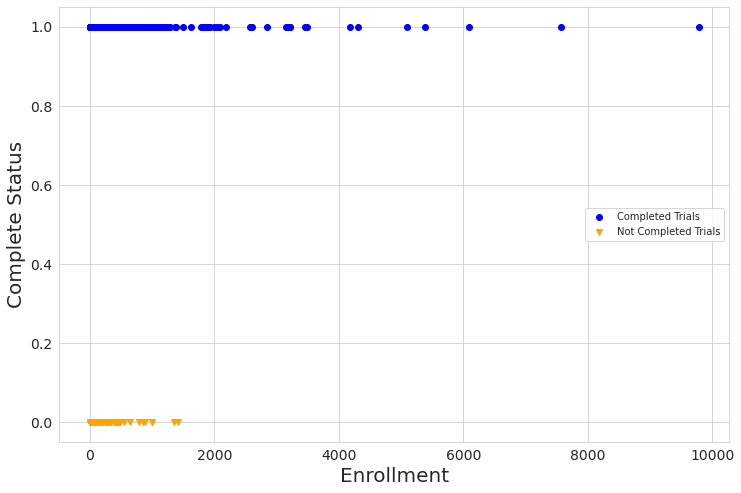

In [35]:
plt.figure(figsize=(12,8))

clTrials_train_completed = clTrials_train[clTrials_train["Status"]=="Completed"]
clTrials_train_not_completed = clTrials_train[clTrials_train["Status"]!="Completed"]

plt.scatter(clTrials_train_completed["Enrollment"],
               clTrials_train_completed["Completed_Status"],color = 'b',label = "Completed Trials")

plt.scatter(clTrials_train_not_completed["Enrollment"],
               clTrials_train_not_completed["Completed_Status"],color = 'orange',marker = 'v',label = "Not Completed Trials")


plt.legend(loc = "center right")
plt.xlabel("Enrollment", fontsize=20)
plt.ylabel("Complete Status", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


We modify the df so that enrollment <= 1500. Because, training set shows that if it is >1500, then it is completed.


So, in our model, first we should check whether enrollment > 1500.

For a model, if we don't use enrollment, then the original clTrials can be used.

In [36]:
clTrials_completed = clTrials[clTrials["Status"]=="Completed"]
clTrials_not_completed = clTrials[clTrials["Status"]!="Completed"]

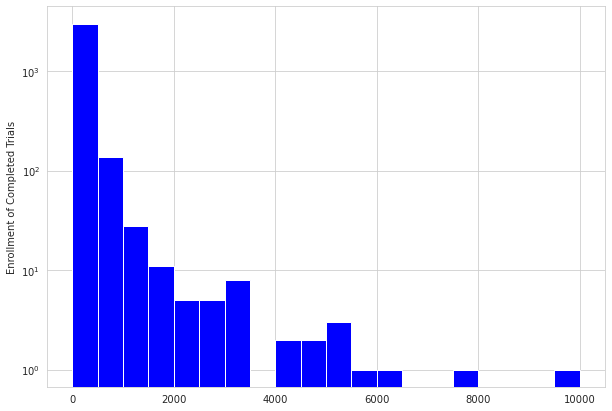

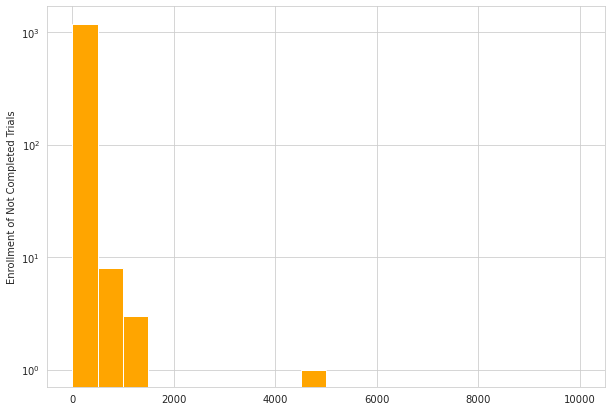

In [37]:
a1 = np.array(clTrials_completed["Enrollment"])
 
# Creating histogram
fig, a1x = plt.subplots(figsize =(10, 7))
#a1x.hist(a1, bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500],color = 'b')
a1x.hist(a1, bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000],color = 'b')
plt.yscale("log")
plt.ylabel("Enrollment of Completed Trials")


a2 = np.array(clTrials_not_completed["Enrollment"])
 
# Creating histogram
fig, a2x = plt.subplots(figsize =(10, 7))
#a2x.hist(a2, bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,2000],color = 'orange')
a2x.hist(a2, bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000],color = 'orange')


 
# Show plot

plt.ylabel("Enrollment of Not Completed Trials")
plt.yscale("log")
plt.show()

In [38]:
#Here we introduce the modified data.

clTrials_train_modified = clTrials_train[clTrials_train['Enrollment'] <= 1500]
clTrials_test_modified = clTrials_test[clTrials_test['Enrollment'] <= 1500]

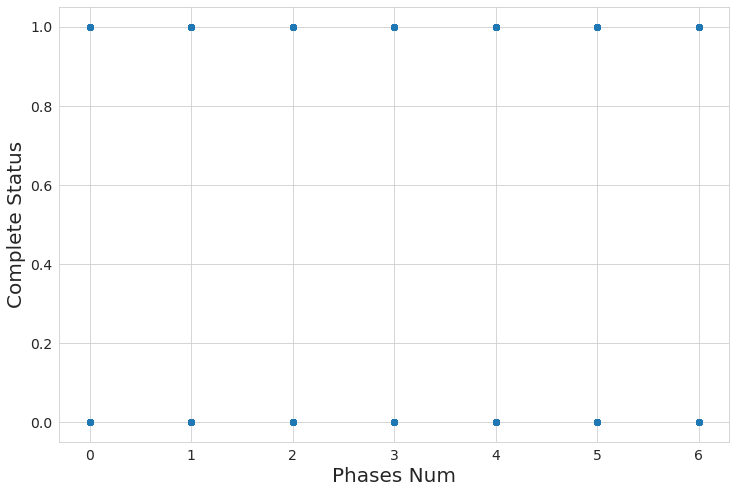

In [39]:
# We know this is stupid :))

plt.figure(figsize=(12,8))

plt.scatter(clTrials_train["Phases Num"],
               clTrials_train["Completed Status"])

plt.xlabel("Phases Num", fontsize=20)
plt.ylabel("Complete Status", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

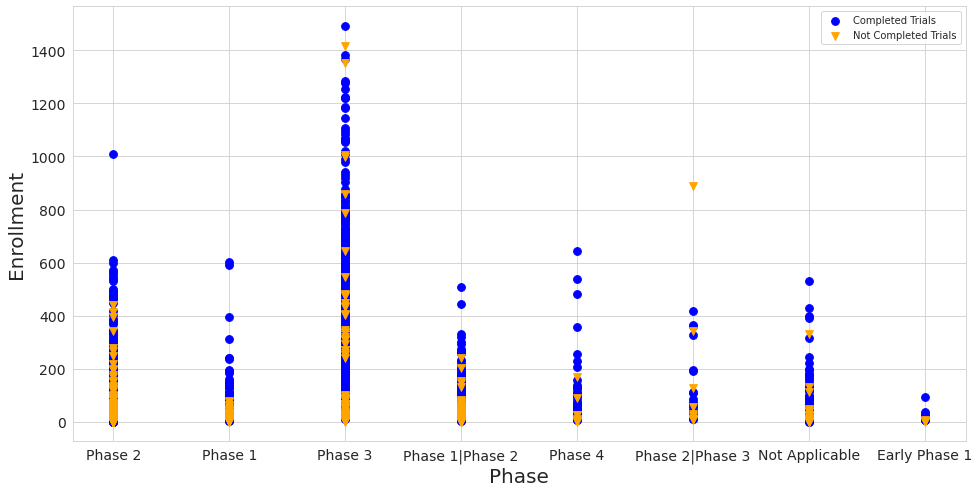

In [40]:
plt.figure(figsize=(16,8))

# plt.scatter(clTrials_train["Phases Num"],
#                clTrials_train["Enrollment"])


plt.scatter(clTrials_train_modified.loc[clTrials_train_modified.Status=='Completed']['Phases'],
            clTrials_train_modified.loc[clTrials_train_modified.Status =='Completed']['Enrollment'],
            c='blue',
            s=60,
            label="Completed Trials")

plt.scatter(clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Phases'],
            clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Enrollment'],
            c='orange',
            s=60,
            marker='v',
            label="Not Completed Trials")


plt.xlabel("Phase", fontsize=20)
plt.ylabel("Enrollment", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = "upper right")

plt.show()



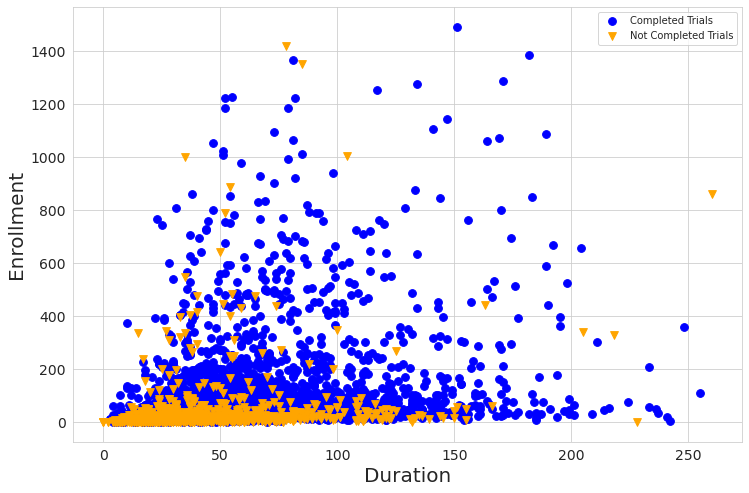

In [41]:
plt.figure(figsize=(12,8))

# plt.scatter(clTrials_train["Phases Num"],
#                clTrials_train["Enrollment"])


plt.scatter(clTrials_train_modified.loc[clTrials_train_modified.Status=='Completed']['Study Duration (months)'],
            clTrials_train_modified.loc[clTrials_train_modified.Status =='Completed']['Enrollment'],
            c='blue',
            s=60,
            label="Completed Trials")

plt.scatter(clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Study Duration (months)'],
            clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Enrollment'],
            c='orange',
            s=60,
            marker='v',
            label="Not Completed Trials")


plt.xlabel("Duration", fontsize=20)
plt.ylabel("Enrollment", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = "upper right")

plt.show()

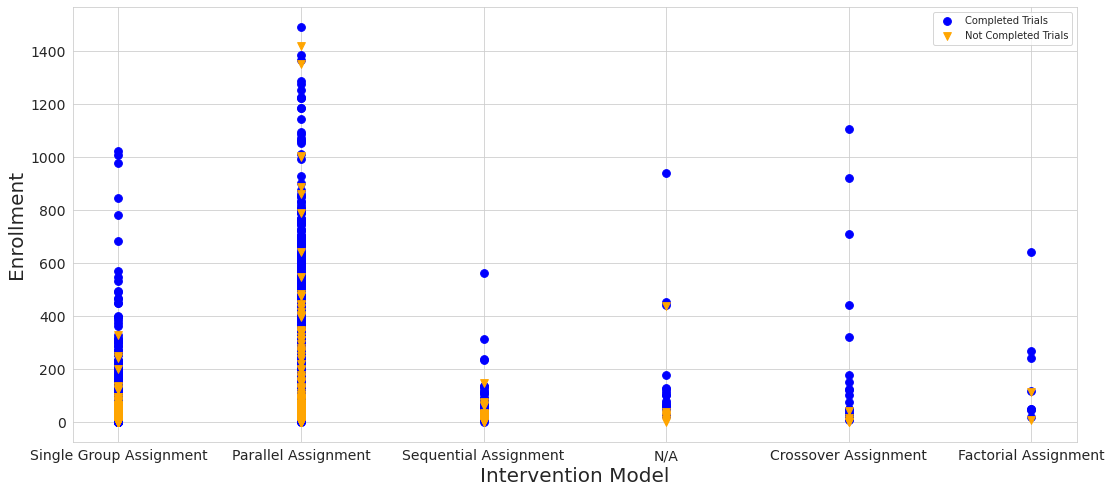

In [42]:
plt.figure(figsize=(18,8))

# plt.scatter(clTrials_train["Phases Num"],
#                clTrials_train["Enrollment"])


plt.scatter(clTrials_train_modified.loc[clTrials_train_modified.Status=='Completed']['Intervention_model_string'],
            clTrials_train_modified.loc[clTrials_train_modified.Status =='Completed']['Enrollment'],
            c='blue',
            s=60,
            label="Completed Trials")

plt.scatter(clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Intervention_model_string'],
            clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Enrollment'],
            c='orange',
            s=60,
            marker='v',
            label="Not Completed Trials")


plt.xlabel("Intervention Model", fontsize=20)
plt.ylabel("Enrollment", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = "upper right")

plt.show()

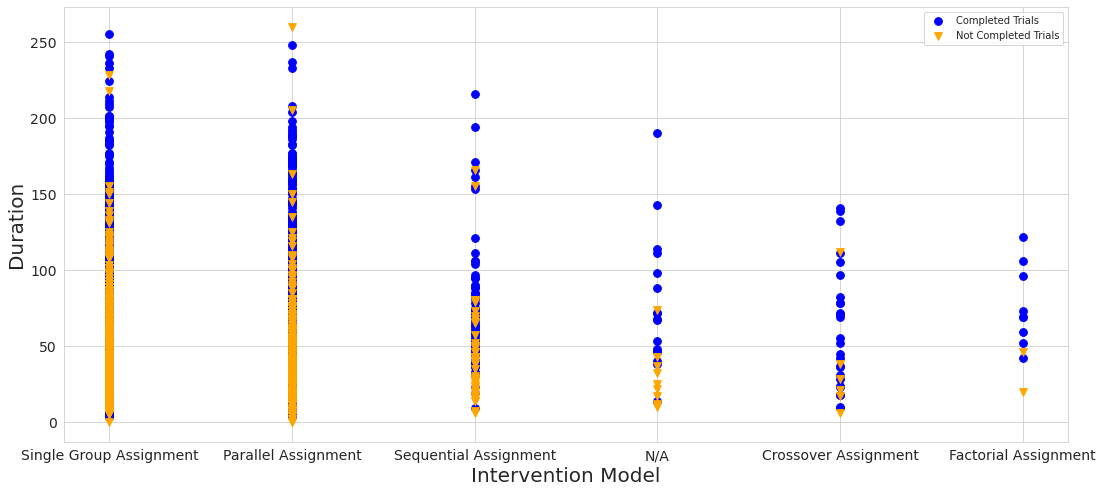

In [43]:
# NOT MODIFIED has been used here!

plt.figure(figsize=(18,8))


# plt.scatter(clTrials_train["Phases Num"],
#                clTrials_train["Enrollment"])


plt.scatter(clTrials_train.loc[clTrials_train.Status=='Completed']['Intervention_model_string'],
            clTrials_train.loc[clTrials_train.Status =='Completed']['Study Duration (months)'],
            c='blue',
            s=60,
            label="Completed Trials")

plt.scatter(clTrials_train.loc[clTrials_train.Status !='Completed']['Intervention_model_string'],
            clTrials_train.loc[clTrials_train.Status !='Completed']['Study Duration (months)'],
            c='orange',
            s=60,
            marker='v',
            label="Not Completed Trials")


plt.xlabel("Intervention Model", fontsize=20)
plt.ylabel("Duration", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = "upper right")

plt.show()

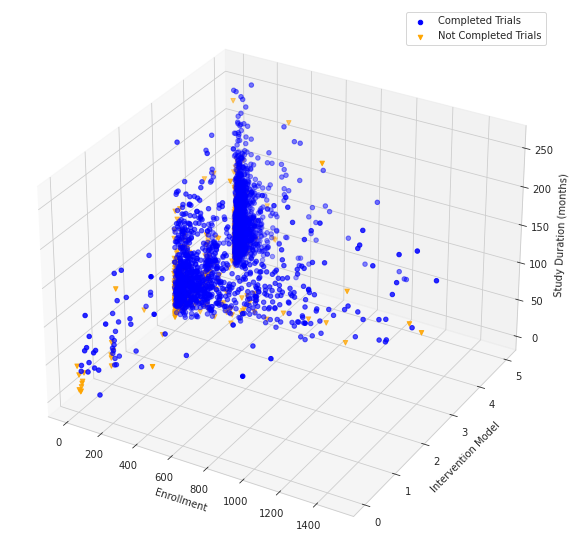

In [44]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = clTrials_train_modified.loc[clTrials_train_modified.Status =='Completed']['Study Duration (months)']
xdata = clTrials_train_modified.loc[clTrials_train_modified.Status =='Completed']['Enrollment']
ydata = clTrials_train_modified.loc[clTrials_train_modified.Status =='Completed']['Intervention Model'] 
ax.scatter3D(xdata, ydata, zdata, color="b",label = "Completed Trials");

Zdata = clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Study Duration (months)']
Xdata = clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Enrollment']
Ydata = clTrials_train_modified.loc[clTrials_train_modified.Status !='Completed']['Intervention Model']


ax.set_xlabel('Enrollment')
ax.set_ylabel('Intervention Model')
ax.set_zlabel('Study Duration (months)') 
ax.scatter3D(Xdata, Ydata, Zdata, color="orange",marker = "v",label = "Not Completed Trials");
ax.legend(loc = "upper right")


# SOME COMMENTS MAYBE